In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

In [3]:
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt

fpath = Path(mpl.get_data_path(), "fonts/ttf/NotoSansSC-Regular.ttf")

def plot_count_vs_sentiment(term, translation):
    """The term in question must already have had a frequency count and sentiment analysis run and stored
    as csv files in the appropriate folders"""

    # read in results
    frequency_df = pd.read_csv(f"./frequency_counts/{term}_quarter_counts.csv")
    sentiment_df = pd.read_csv(f"./quarter_sentiments/{term}_quarter_sentiments.csv")

    combined_df = pd.merge(frequency_df, sentiment_df, on="year_quarter")

    fig, ax1 = plt.subplots()

    xvals = list(combined_df["year_quarter"])
    y1 = list(combined_df["count"])
    y2 = list(combined_df["positive"])
    y3 = list(combined_df["negative"])

    # count y-axis
    ax1_color = "tab:blue"
    ax1.plot(xvals, y1, color=ax1_color)
    ax1.set_ylabel("Count", color=ax1_color)
    ax1.set_ylim([0, None])

    # sentiment y-axis
    ax2 = ax1.twinx()
    # positive sentiment
    ax2.plot(xvals, y2, label="Positive Sent.", color="tab:green")
    # negative sentiment
    ax2.plot(xvals, y3, label="Negative Sent.", color="tab:red")
    ax2.set_ylabel("Sentiment")
    ax2.legend()
    ax2.set_ylim([0, 1])

    # common x axis
    ax1.set_xlabel("Quarter")
    ax1.tick_params(axis='x', rotation=50)
    ax1.set_title(f"Sentiment and Frequency of {term} ({translation}) over Time", font=fpath)
    ax1.tick_params(axis='x', rotation=50)
    ax1.grid()
    plt.show()



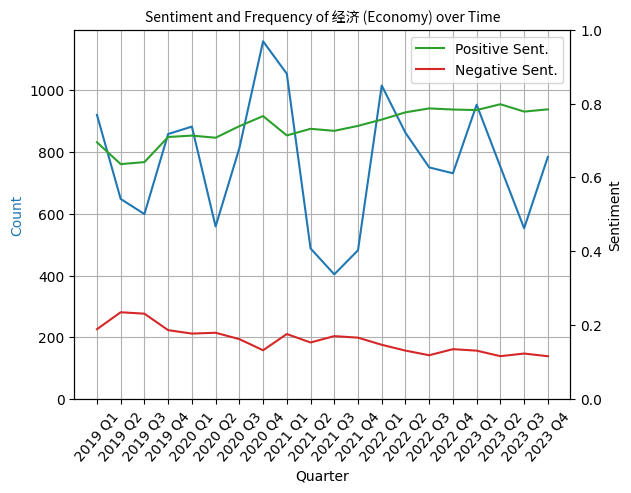

In [4]:
plot_count_vs_sentiment("经济", "Economy")

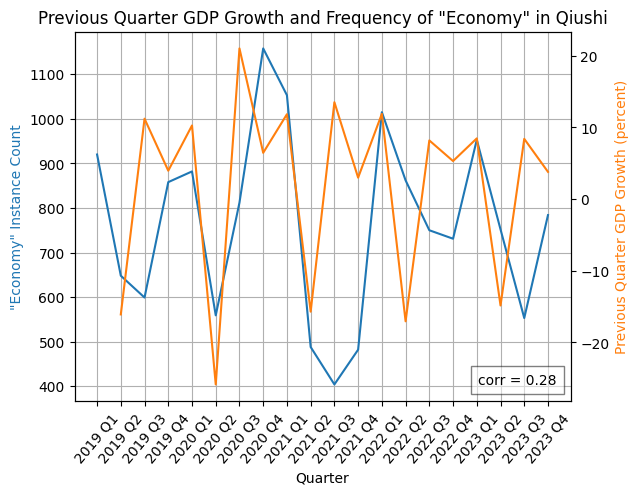

In [6]:
# graph the Qiushi count of econ against lagged percent GDP growth

econ_data = pd.read_csv("../process_economic_data/processed_quarterly_data.csv")
econ_count = pd.read_csv("./frequency_counts/经济_quarter_counts.csv")

combined_df = pd.merge(econ_data, econ_count, on="year_quarter")

fig, ax1 = plt.subplots()

xvals = list(combined_df["year_quarter"])
xvals.reverse()
# get the lists we need, and take of the last value (incomplete Q1 of 2024)
y1 = list(combined_df["count"])
y1.reverse()
y2 = list(combined_df["quarter_gdp_growth"].shift(-1))
y2.reverse()

# count y-axis
ax1_color = "tab:blue"
ax1.plot(xvals, y1, color=ax1_color)
ax1.set_ylabel("\"Economy\" Instance Count", color=ax1_color)
# ax1.set_ylim([0, None])

# gdp y-axis
ax2_color = "tab:orange"
ax2 = ax1.twinx()
ax2.plot(xvals, y2, color=ax2_color)
ax2.set_ylabel("Previous Quarter GDP Growth (percent)", color=ax2_color)
# ax2.set_ylim([0, 1])

# common x axis
ax1.set_xlabel("Quarter")
ax1.tick_params(axis='x', rotation=50)
ax1.set_title(f"Previous Quarter GDP Growth and Frequency of \"Economy\" in Qiushi")
ax1.tick_params(axis='x', rotation=50)
ax1.grid()

# add a text box with the correlation 
correlation = round(combined_df["count"].corr(combined_df["quarter_gdp_growth"].shift(-1)), 2)

text_box = AnchoredText(f"corr = {correlation}", frameon=True, loc='lower right', pad=0.5)
plt.setp(text_box.patch, facecolor='white', alpha=0.5)
ax1.add_artist(text_box)

plt.savefig("../visuals/prev_q_gdp_econ_count.png", bbox_inches="tight")
plt.show()

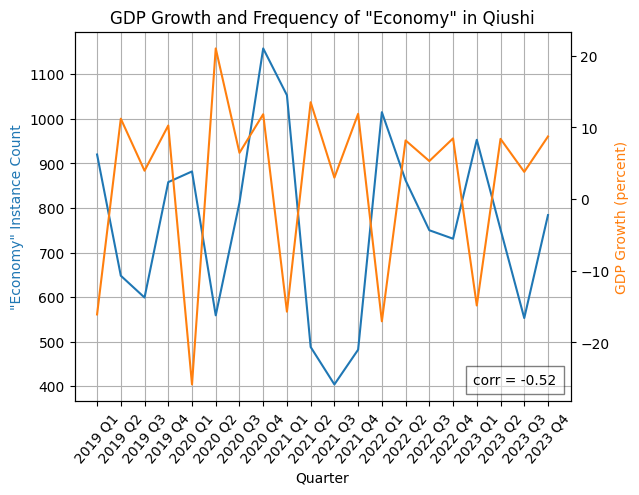

In [7]:
# graph the Qiushi count of econ against lagged percent GDP growth



econ_data = pd.read_csv("../process_economic_data/processed_quarterly_data.csv")
econ_count = pd.read_csv("./frequency_counts/经济_quarter_counts.csv")

combined_df = pd.merge(econ_data, econ_count, on="year_quarter")

fig, ax1 = plt.subplots()

xvals = list(combined_df["year_quarter"])
xvals.reverse()
# get the lists we need, and take of the last value (incomplete Q1 of 2024)
y1 = list(combined_df["count"])
y1.reverse()
y2 = list(combined_df["quarter_gdp_growth"])
y2.reverse()

# count y-axis
ax1_color = "tab:blue"
ax1.plot(xvals, y1, color=ax1_color)
ax1.set_ylabel("\"Economy\" Instance Count", color=ax1_color)
# ax1.set_ylim([0, None])

# gdp y-axis
ax2_color = "tab:orange"
ax2 = ax1.twinx()
ax2.plot(xvals, y2, color=ax2_color)
ax2.set_ylabel("GDP Growth (percent)", color=ax2_color)
# ax2.set_ylim([0, 1])

# common x axis
ax1.set_xlabel("Quarter")
ax1.tick_params(axis='x', rotation=50)
ax1.set_title(f"GDP Growth and Frequency of \"Economy\" in Qiushi")
ax1.tick_params(axis='x', rotation=50)
ax1.grid()

# add a text box with the correlation 
correlation = round(combined_df["count"].corr(combined_df["quarter_gdp_growth"]), 2)

text_box = AnchoredText(f"corr = {correlation}", frameon=True, loc='lower right', pad=0.5)
plt.setp(text_box.patch, facecolor='white', alpha=0.5)
ax1.add_artist(text_box)

plt.savefig("../visuals/curr_q_gdp_econ_count.png", bbox_inches="tight")
plt.show()